In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import shutil # to move files from one folder to the another
import glob

import seaborn as sns
import plotly.express as px

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
# For model creation and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [44]:
!wget https://www.dropbox.com/s/ok34wbkwdtnpcg0/cancer%20patient%20data%20sets.csv?dl=0

--2023-06-03 06:19:48--  https://www.dropbox.com/s/ok34wbkwdtnpcg0/cancer%20patient%20data%20sets.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ok34wbkwdtnpcg0/cancer%20patient%20data%20sets.csv [following]
--2023-06-03 06:19:49--  https://www.dropbox.com/s/raw/ok34wbkwdtnpcg0/cancer%20patient%20data%20sets.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1206f7ed9dd66be66e21a7437.dl.dropboxusercontent.com/cd/0/inline/B9SF94GfEQF9G7P9RGsQEalW19MUEzW1bzH-86S-BDodqFAqklbMhKKib-5ncsll46NaFXiGHoVnyfB0PHkQ3Bq8dag6Ll-TP3fYh8-AAYnmGXFM_rOoU1m-3jY8GRtq6lPJ7tS5L-SZ8blNPocpT9D5O_w4DPcKMG8ktw5MZ2JS6w/file# [following]
--2023-06-03 06:19:49--  https://uce1206f7ed9dd66be66e21a7437.dl.dropboxusercontent.com/cd/0/inline/B9SF94

In [45]:
# Load dataset
data = pd.read_csv("/content/cancer patient data sets.csv?dl=0")

In [46]:
# check for missing values
print(data.isnull().sum())
# drop rows with missing values
data.dropna(inplace=True)

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [15]:
data.drop_duplicates(keep='first')

,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
0,2016-05-01,34,-1,1005.63,24,4,43,26,9,-10,1009,999,0.0
1,2016-05-02,36,4,1005.46,21,6,43,29,10,-2,1008,1001,0.0
2,2016-05-03,35,6,1006.00,27,5,41,29,12,-2,1009,1000,0.0
3,2016-05-04,34,7,1005.65,29,6,41,27,13,0,1008,1001,0.0
4,2016-05-05,31,11,1007.94,61,13,38,24,16,6,1011,1003,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,2018-03-07,24,2,1014.07,55,5,32,15,8,-6,1017,1011,0.0
675,2018-03-08,24,1,1014.41,42,7,32,15,5,-5,1017,1011,0.0
676,2018-03-09,26,3,1014.16,37,8,33,19,6,-1,1017,1009,0.0
677,2018-03-10,26,4,1013.76,38,6,34,19,8,0,1017,1009,0.0


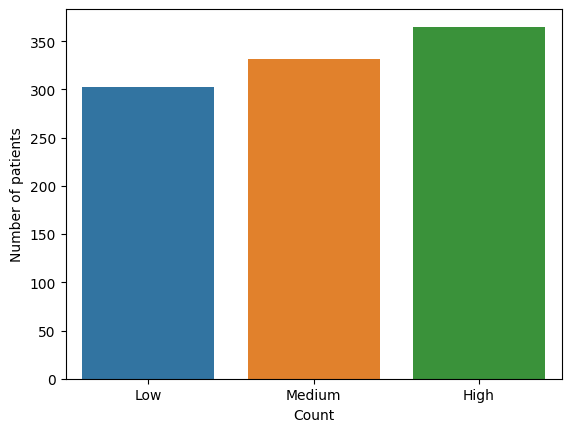

In [48]:
# Check weather distribution
plt.figure(dpi=100)
sns.countplot(data=data, x="Level") #Precipitation (PRECIPM). Precipitation is the total amount of rain that falls within a specific observation period
plt.xlabel("Count")
plt.ylabel("Number of patients")
plt.show()

In [49]:
# Label rain precentage into Raining (1) and Not rainging (0)
# data['Level'] = data['Level'].apply(lambda x: 1 if x >= 50 else 0)

data['Level'] = data['Level'].apply(lambda x: 2 if x == "High" else (1 if x == "Medium" else 0))


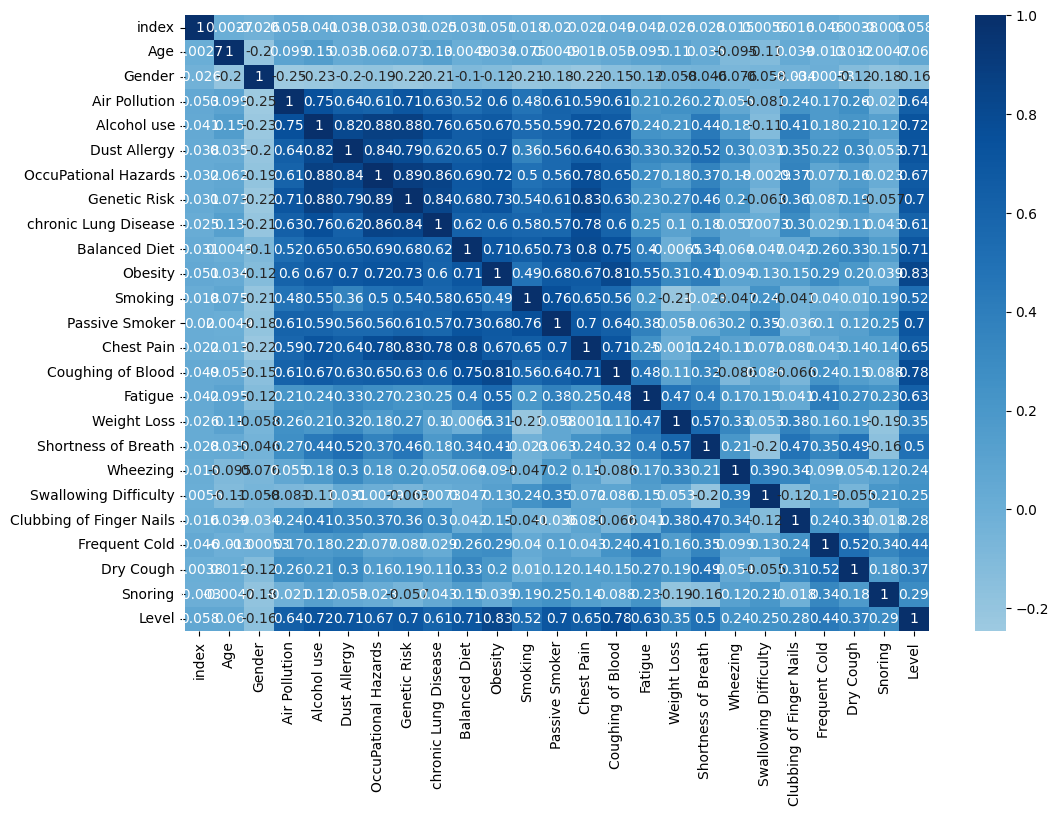

In [51]:
# Calculate the correlation matrix
corr_matrix = data.corr()
# Plot heatmap
plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(corr_matrix, center=0, cmap='Blues', annot=True)
plt.show()

In [56]:
# Drop the target variable
X = data.drop(['Level','Patient Id'], axis=1)
# Set the target variable as the label
y = data['Level']

In [57]:
# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [58]:
# Create an object of the logistic regression model
logreg_model = LogisticRegression()

In [59]:
# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [60]:
from sklearn.model_selection import GridSearchCV

In [63]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create a logistic regression model
logistic_model = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(logistic_model, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_

# Calculate F1 scores
initial_model = LogisticRegression()  # Instantiate a new logistic regression model
initial_model.fit(X_train, y_train)  # Fit the model on the training data
initial_model_f1 = f1_score(y_test, initial_model.predict(X_test),average = 'macro')

best_model_f1 = f1_score(y_test, grid_search.best_estimator_.predict(X_test), average = 'macro')

print("Initial Model F1 Score:", initial_model_f1)
print("Best Model F1 Score:", best_model_f1)

# Choose the best model
best_logistic_model = grid_search.best_estimator_
print(best_logistic_model)

Initial Model F1 Score: 0.9356530262190638
Best Model F1 Score: 0.9688408606319054
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [72]:
# Predict the labels of the test set
y_pred = grid_search.predict(X_test)

In [73]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

In [113]:
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# Compute the precision of the model
precision = precision_score(y_test, y_pred, average = 'macro')
# Compute the recall of the model
recall = recall_score(y_test, y_pred, average = 'macro')
# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred, average = 'macro')
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1_score = ", f1)

Accuracy =  0.97
Precision =  0.9694472194472196
Recall =  0.9684873949579832
F1_score =  0.9688408606319054


In [118]:
pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.0
    Uninstalling Werkzeug-2.3.0:
      Successfully uninstalled Werkzeug-2.3.0


In [119]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State

In [120]:
# Create the Dash app
app = dash.Dash(__name__)
# Define the layout of the dashboard
app.layout = html.Div(
children=[
html.H1('Lung Cancer Level Prediction',style={'backgroundColor':'white'}),
# Layout for exploratory data analysis: correlation between two selected features
html.Div([
html.H3('Exploratory Data Analysis'),
html.Label('Feature 1 (X-axis)'),
dcc.Dropdown(
id='x_feature',
options=[{'label': col, 'value': col} for col in data.columns],
value=data.columns[0]
)
], style={'width': '30%', 'display': 'inline-block'}),
html.Div([
html.Label('Feature 2 (Y-axis)'),
dcc.Dropdown(
id='y_feature',
options=[{'label': col, 'value': col} for col in data.columns],
value=data.columns[1]
)
], style={'width': '30%', 'display': 'inline-block'}),
dcc.Graph(id='correlation_plot'),
# Layout for wine quality prediction based on input feature values
html.H3("Wine Quality Prediction"),
html.Div([
    html.Table([
        html.Tr([
            html.Td(html.Label("Age")),
            html.Td(dcc.Input(id='age', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Gender")),
            html.Td(dcc.Input(id='gender', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Air Pollution")),
            html.Td(dcc.Input(id='air_pollution', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Alcohol Use")),
            html.Td(dcc.Input(id='alcohol_use', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Dust Allergy")),
            html.Td(dcc.Input(id='dust_allergy', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("OccuPational Hazards")),
            html.Td(dcc.Input(id='occupational_hazards', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Genetic Risk")),
            html.Td(dcc.Input(id='genetic_risk', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("chronic Lung Disease")),
            html.Td(dcc.Input(id='chronic_lung_disease', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Balanced Diet")),
            html.Td(dcc.Input(id='balanced_diet', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Obesity")),
            html.Td(dcc.Input(id='obesity', type='number', required=True))
        ]),
         html.Tr([
            html.Td(html.Label("Smoking")),
            html.Td(dcc.Input(id='smoking', type='number', required=True))
        ]),
         html.Tr([
            html.Td(html.Label("Passive Smoker")),
            html.Td(dcc.Input(id='passive_smoker', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Chest Pain")),
            html.Td(dcc.Input(id='chest_pain', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Coughing of Blood")),
            html.Td(dcc.Input(id='coughing_of_blood', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Fatigue")),
            html.Td(dcc.Input(id='fatigue', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Weight Loss")),
            html.Td(dcc.Input(id='weight_loss', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Shortness of Breath")),
            html.Td(dcc.Input(id='shortness_of_breath', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Wheezing")),
            html.Td(dcc.Input(id='wheezing', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Swallowing Difficulty")),
            html.Td(dcc.Input(id='swallowing_difficulty', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Clubbing of Finger Nails")),
            html.Td(dcc.Input(id='clubbing_of_finger_nails', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Frequent Cold")),
            html.Td(dcc.Input(id='frequent_cold', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Dry Cough")),
            html.Td(dcc.Input(id='dry_cough', type='number', required=True))
        ]),
        html.Tr([
            html.Td(html.Label("Snoring")),
            html.Td(dcc.Input(id='snoring', type='number', required=True))
        ])
    ])
])
,
html.Div([
html.Button('Predict', id='predict-button', n_clicks=0),
]),
html.Div([
html.H4("Predicted Quality"),
html.Div(id='prediction-output')
])
])


In [116]:
print(data.isnull().sum())

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [121]:
# Define the callback to update the correlation plot
@app.callback(
  dash.dependencies.Output('correlation_plot', 'figure'),
  [dash.dependencies.Input('x_feature', 'value'),
  dash.dependencies.Input('y_feature', 'value')]
)
def update_correlation_plot(x_feature, y_feature):
  fig = px.scatter(data, x=x_feature, y=y_feature, color='quality')
  fig.update_layout(title=f"Correlation between {x_feature} and {y_feature}")
  return fig
# Define the callback function to predict wine quality
@app.callback(
  Output(component_id='prediction-output', component_property='children'),
  [Input('predict-button', 'n_clicks')],
  [State('age', 'value'),
  State('gender', 'value'),
  State('air_pollution', 'value'),
  State('alcohol_use', 'value'),
  State('dust_allergy', 'value'),
  State('occupational_hazards', 'value'),
  State('genetic_risk', 'value'),
  State('chronic_lung_disease', 'value'),
  State('balanced_diet', 'value'),
  State('obesity', 'value'),
  State('smoking', 'value'),
  State('passive_smoker', 'value'),
  State('chest_pain', 'value'),
  State('coughing_of_blood', 'value'),
  State('fatigue', 'value'),
  State('weight_loss', 'value'),
  State('shortness_of_breath', 'value'),
  State('wheezing', 'value'),
  State('swallowing_difficulty', 'value'),
  State('clubbing_of_finger_nails', 'value'),
  State('frequent_cold', 'value'),
  State('dry_cough', 'value'),
  State('snoring', 'value')]
)
def predict_quality(n_clicks, age, gender, air_pollution,alcohol_use,
    dust_allergy, occupational_hazards, genetic_risk, chronic_lung_disease,
    balanced_diet, obesity, smoking, passive_smoker, chest_pain, 
    coughing_of_blood, fatigue, weight_loss, shortness_of_breath, wheezing,
    swallowing_difficulty, clubbing_of_finger_nails, frequent_cold, dry_cough,
    snoring):
  # Create input features array for prediction
  input_features = np.array([age, gender, air_pollution,alcohol_use,
    dust_allergy, occupational_hazards, genetic_risk, chronic_lung_disease,
    balanced_diet, obesity, smoking, passive_smoker, chest_pain, 
    coughing_of_blood, fatigue, weight_loss, shortness_of_breath, wheezing,
    swallowing_difficulty, clubbing_of_finger_nails, frequent_cold, dry_cough,
    snoring]).reshape(1, -1)
  # Predict the wine quality (0 = bad, 1 = good)
  prediction = logreg_model.predict(input_features)[0]
  # Return the prediction
  if prediction == 2:
    return 'High'
  elif prediction == 1:
    return 'Medium'
  else:
    return 'Low'

In [ ]:
if __name__ == '__main__':
  app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8050
INFO:werkzeug:Press CTRL+C to quit
